In [163]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib


from sklearn import svm
#from multi_class_classifiers import XGboost_classifier, RandomForest_classifier, AdaBoost_classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd


In [164]:
# load feature_mat.csv;
import csv
#with open('feature_mat.csv', 'r') as f:
#with open('feature_mat_num.csv', 'r') as f:
with open('feature_mat_v8.csv', 'r') as f:
    A = csv.reader(f)
    temp = list(A)
print(temp[0])
np_all = temp[1:]
#print(X)
#X = np.genfromtxt('role_stat.csv', delimiter=',')
np_all = np.array(np_all)
print(np_all.shape)
print(np_all[0,:])
N,p = np_all.shape[0], np_all.shape[0]-1

['ANON_ID', 'label', 'gender_bool', 'age', 'chemo_dx_hist', 'other_long_therapy_dx_hist', 'MDS_dx_hist', 'Thrombocytopenia_dx_hist', 'Neoplasm_dx_hist', 'skin_eruption_dx_hist', 'Sezary_dx_hist', 'myelodysplastic_dx_hist', 'hypertension_dx_hist', 'Myelofibrosis_dx_hist', 'Mycosis_dx_hist', 'Cancer_med_hist', 'Other_med_hist', 'CAD_med_hist', 'abn_WBC', 'avg_WBC', 'abn_Hgb', 'avg_Hgb', 'abn_RDW', 'avg_RDW', 'abn_MCV', 'avg_MCV', 'abn_Esn', 'avg_Esn', 'abn_Mnc', 'avg_Mnc', 'abn_MCH', 'avg_MCH', 'abn_LDH', 'avg_LDH', 'abn_CD34', 'avg_CD34', 'abn_CD3PanT', 'avg_CD3PanT', 'abn_CD48', 'avg_CD48', 'abn_CD19', 'avg_CD19', 'abn_Anion', 'avg_Anion', 'abn_IgG', 'avg_IgG', 'abn_Basophils', 'avg_Basophils', 'abn_RBC', 'avg_RBC', 'abn_Globulin', 'avg_Globulin', 'abn_Lym', 'avg_Lym', 'abn_Ntr', 'avg_Ntr', 'abn_BUN', 'avg_BUN', 'abn_eGFR', 'avg_eGFR', 'abn_Albumin', 'avg_Albumin', 'abn_Glc', 'avg_Glc', 'abn_Cal', 'avg_Cal', 'abn_Crt', 'abn_Alk', 'DEXAMETHASONE_med_hist', 'IV_BOLUS_med_hist', 'ONDANSET

In [ ]:
# check if the labels are corretly matched
print(np_all[20,[0,1]])
print(np_all[120,[0,1]])
print(np_all[420,[0,1]])
print(np_all[820,[0,1]])
print(np_all[920,[0,1]])

In [165]:
# split the data and prepare for training
#print(np_all[299:300,2:])

X_all = np_all[:,2:].astype(float)
Y_all = np_all[:,1].astype(float).astype(int)


In [166]:
## Preleminary feature anaysis

# normalize the features
print(temp[0][2:])
#print(X_all[100:110,:])

print('max of features: ', np.max(X_all,axis=0))
print('min of features: ', np.min(X_all,axis=0))

# Exclude some of the features
#X_all = X_all[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] # exclude 4 and 13
print(X_all.shape)

print(np.where(Y_all==0)[0].shape[0])
print(np.where(Y_all==1)[0].shape[0])
# normalize
X_all = X_all / np.max(X_all,axis=0)
#print('Normalized feature matrix: ')
#print(X_all)
print(np.mean(X_all[:,5]))

['gender_bool', 'age', 'chemo_dx_hist', 'other_long_therapy_dx_hist', 'MDS_dx_hist', 'Thrombocytopenia_dx_hist', 'Neoplasm_dx_hist', 'skin_eruption_dx_hist', 'Sezary_dx_hist', 'myelodysplastic_dx_hist', 'hypertension_dx_hist', 'Myelofibrosis_dx_hist', 'Mycosis_dx_hist', 'Cancer_med_hist', 'Other_med_hist', 'CAD_med_hist', 'abn_WBC', 'avg_WBC', 'abn_Hgb', 'avg_Hgb', 'abn_RDW', 'avg_RDW', 'abn_MCV', 'avg_MCV', 'abn_Esn', 'avg_Esn', 'abn_Mnc', 'avg_Mnc', 'abn_MCH', 'avg_MCH', 'abn_LDH', 'avg_LDH', 'abn_CD34', 'avg_CD34', 'abn_CD3PanT', 'avg_CD3PanT', 'abn_CD48', 'avg_CD48', 'abn_CD19', 'avg_CD19', 'abn_Anion', 'avg_Anion', 'abn_IgG', 'avg_IgG', 'abn_Basophils', 'avg_Basophils', 'abn_RBC', 'avg_RBC', 'abn_Globulin', 'avg_Globulin', 'abn_Lym', 'avg_Lym', 'abn_Ntr', 'avg_Ntr', 'abn_BUN', 'avg_BUN', 'abn_eGFR', 'avg_eGFR', 'abn_Albumin', 'avg_Albumin', 'abn_Glc', 'avg_Glc', 'abn_Cal', 'avg_Cal', 'abn_Crt', 'abn_Alk', 'DEXAMETHASONE_med_hist', 'IV_BOLUS_med_hist', 'ONDANSETRON_med_hist', 'LIDO

In [156]:
# Feature Selection

#I_subset = np.array([1, 20, 23,  0, 27, 35, 10, 11, 31,  3])  #8, 32,  9, 26, 34])

#I_subset = np.array([1, 20,  5,  9, 22, 28, 27,  6, 10, 23,  7, 30, 26, 29, 24,  8])

#I_subset = np.array([5.,  1.,  6., 39., 16., 13., 44., 38.,  9., 20., 36., 29., 35.,
#       12.,  7., 54.,  0., 49., 50., 18.]).astype(int)

#I_subset = np.array([25., 53.,  1., 45., 13.,  9., 27., 19., 11., 23., 51., 42.,  7.,
#        2., 39.,  5., 62.,  0., 16., 63.]).astype(int)
    
I_subset = np.array([16.,  1., 17., 50., 61., 20., 27., 18.,  0., 23., 26., 29., 31.,
       55., 52.]).astype(int)

#I_subset = np.array([51., 35., 13., 49., 53., 32.]).astype(int)
                     
#I_subset = np.array([1, 20,  5,  9, 22, 28, 27,  6, 10, 23,  7])

#I_subset = np.array([1, 20, 23,  0, 27, 35, 10])
feature_names = temp[0][2:]
print([feature_names[i] for i in I_subset])


X_all = X_all[:,I_subset]

#print(X_all.shape)


['abn_WBC', 'age', 'avg_WBC', 'abn_Lym', 'avg_Glc', 'abn_RDW', 'avg_Mnc', 'abn_Hgb', 'gender_bool', 'avg_MCV', 'abn_Mnc', 'avg_MCH', 'avg_LDH', 'avg_BUN', 'abn_Ntr']


In [167]:
# split to train and test and apply random permutation

N_train = 900
N_test = N - N_train


# random permutation
I = np.random.permutation(N)
#print(I[:40])
#print(I.shape)
#I_a = np.array([ 367,  988, 1108,  883,  896 ,1054,  930  ,159 , 147 ])

print('N: ',N)
PID = np_all[I,0]
X_perm = X_all[I,:]
Y_perm = Y_all[I]

print(np.mean(X_all[:,5]))
print(np.mean(X_perm[:,5]))


# train and test data
X_train = X_perm[:N_train,:].astype(float)
X_test = X_perm[N_train:,].astype(float)

Y_train = Y_perm[:N_train].astype(float).astype(int)
Y_test = Y_perm[N_train:].astype(float).astype(int)

PID_test = PID[N_train:]

print(np.mean(X_train[:,5]))
print(np.mean(X_test[:,5]))

# test labels
#print(np.where(Y_all==0)[0].shape[0])
#print(np.where(Y_all==1)[0].shape[0])

#print(np.where(Y_perm==0)[0].shape[0])
#print(np.where(Y_perm==1)[0].shape[0])

print('labels for train dataset: ')
print(np.where(Y_train==0)[0].shape[0])
print(np.where(Y_train==1)[0].shape[0])

print('labels for test dataset: ')
print(np.where(Y_test==0)[0].shape[0])
print(np.where(Y_test==1)[0].shape[0])


N:  1126
0.1341030195381883
0.1341030195381883
0.13444444444444445
0.13274336283185842
labels for train dataset: 
326
574
labels for test dataset: 
90
136


In [124]:
# Define the classification model: SVM


from machine_learner import *
from sklearn.ensemble import GradientBoostingClassifier as Gradboost, AdaBoostClassifier
from sklearn.svm import SVC
import sklearn
from xgboost import XGBClassifier


#clf = SVC(probability=True) 
#clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)

#Y_pred = AdaBosst_classifier(X_train, Y_train, X_test) 
#Y_pred = RandomForest_classifier(X_train, Y_train, X_test) 
#Y_pred = DecisionTree_classifier(X_train, Y_train, X_test) 
#Y_pred = KNN_classifier(X_train, Y_train, X_test) 




#eval_set = [(X_test, Y_test)]
clf = AdaBoostClassifier()#(n_estimators = 100, learning_rate = 0.2, max_depth=5, subsample = 0.5)
clf.fit(X_train, Y_train)#, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)
Y_pred = clf.predict(X_test)




print(Y_pred[:30])
print(np.where(Y_pred==0)[0].shape[0])

[1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1]
58


In [168]:
# XGBoost


from machine_learner import *
from sklearn.ensemble import GradientBoostingClassifier as Gradboost, AdaBoostClassifier
from sklearn.svm import SVC
import sklearn
from xgboost import XGBClassifier

#Y_test = Y_train
#X_test = X_train

#Y_pred = SVM_classifier(X_train, Y_train, X_test) 
#Y_pred = AdaBosst_classifier(X_train, Y_train, X_test) 
#Y_pred = RandomForest_classifier(X_train, Y_train, X_test) 
#Y_pred = DecisionTree_classifier(X_train, Y_train, X_test) 
#Y_pred = KNN_classifier(X_train, Y_train, X_test) 


#clf = AdaBoostClassifier()
#clf = sklearn.tree.DecisionTreeClassifier() #probability=True)
#clf = XGBoost()
#clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)


eval_set = [(X_test, Y_test)]
clf = XGBClassifier(n_estimators = 100, learning_rate = 0.2, max_depth=5, subsample = 0.5)
clf.fit(X_train, Y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)
Y_pred = clf.predict(X_test)


#model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

#clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=eval_set, verbose=True)
#Y_pred = clf.predict(X_test)

#Y_test = Y_train


print(Y_pred[:30])
print(np.where(Y_pred==0)[0].shape[0])

[0]	validation_0-auc:0.654657
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.656046
[2]	validation_0-auc:0.672835
[3]	validation_0-auc:0.669444
[4]	validation_0-auc:0.67933
[5]	validation_0-auc:0.673979
[6]	validation_0-auc:0.673856
[7]	validation_0-auc:0.680474
[8]	validation_0-auc:0.69183
[9]	validation_0-auc:0.691667
[10]	validation_0-auc:0.680474
[11]	validation_0-auc:0.68268
[12]	validation_0-auc:0.68509
[13]	validation_0-auc:0.687377
[14]	validation_0-auc:0.687908
[15]	validation_0-auc:0.681046
[16]	validation_0-auc:0.687337
[17]	validation_0-auc:0.695956
[18]	validation_0-auc:0.69134
[19]	validation_0-auc:0.689747
[20]	validation_0-auc:0.688603
[21]	validation_0-auc:0.689502
[22]	validation_0-auc:0.687459
[23]	validation_0-auc:0.688848
[24]	validation_0-auc:0.690155
[25]	validation_0-auc:0.687214
[26]	validation_0-auc:0.678554
[27]	validation_0-auc:0.670792
[28]	validation_0-auc:0.665727
[29]	validation_0-auc:0.657067
[30]	validation_0-auc

In [159]:
#Classification performance
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

print('NPV: ',tn/(fn+tn))

print('false omission rate (FOR):', fn/(fn+tn)) # to be set to %10, find (fn+tn)/(T+P)


print('TNR: ',tn/(tn+fp))

print('ratio of the negative tests to the total number of tests:', (tn+fn)/(tn+tp+fp+fn))

NPV:  0.5079365079365079
false omission rate (FOR): 0.49206349206349204
TNR:  0.4155844155844156
ratio of the negative tests to the total number of tests: 0.27876106194690264


In [160]:
# Set custom threshold

from sklearn.metrics import recall_score, precision_score

Y_pred_2 = (clf.predict_proba(X_test)[:,1] >= 0.32).astype(bool)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_2).ravel()

print('NPV: ',tn/(fn+tn))

print('false omission rate (FOR):', fn/(fn+tn)) # to be set to %10, find (fn+tn)/(T+P)


print('TNR: ',tn/(tn+fp))


RC = recall_score(Y_test,Y_pred) # 1- recall
print('Recall: ', RC)

print('ratio of the negative tests to the total number of tests:', (tn+fn)/(tn+tp+fp+fn))


Prc = precision_score(Y_test,Y_pred) 
print('precision: ', Prc)

NPV:  nan
false omission rate (FOR): nan
TNR:  0.0
Recall:  0.7919463087248322
ratio of the negative tests to the total number of tests: 0.0
precision:  0.7239263803680982


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


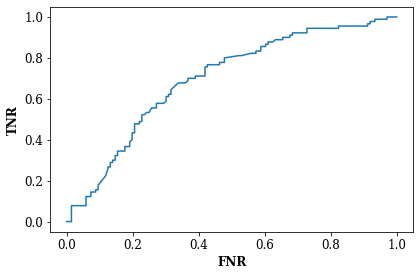

In [169]:
# plot ROC

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time




fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,0], pos_label= 0)
plt.plot(fpr,tpr)

plt.xlabel('FNR')
plt.ylabel('TNR')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_ROC' +'.png', dpi=300)



plt.show()

Thr[i], NPV_vec[i], TNR_vec[i] 0.15 0.0 0.0
Thr[i], NPV_vec[i], TNR_vec[i] 0.16842105263157894 0.0 0.0
Thr[i], NPV_vec[i], TNR_vec[i] 0.1868421052631579 0.0 0.0
Thr[i], NPV_vec[i], TNR_vec[i] 0.20526315789473681 0.3333333333333333 0.011111111111111112
Thr[i], NPV_vec[i], TNR_vec[i] 0.22368421052631576 0.3333333333333333 0.011111111111111112
Thr[i], NPV_vec[i], TNR_vec[i] 0.2421052631578947 0.6666666666666666 0.044444444444444446
Thr[i], NPV_vec[i], TNR_vec[i] 0.26052631578947366 0.6666666666666666 0.044444444444444446
Thr[i], NPV_vec[i], TNR_vec[i] 0.2789473684210526 0.7142857142857143 0.05555555555555555
Thr[i], NPV_vec[i], TNR_vec[i] 0.29736842105263156 0.7777777777777778 0.07777777777777778
Thr[i], NPV_vec[i], TNR_vec[i] 0.3157894736842105 0.5833333333333334 0.07777777777777778
Thr[i], NPV_vec[i], TNR_vec[i] 0.33421052631578946 0.5384615384615384 0.07777777777777778
Thr[i], NPV_vec[i], TNR_vec[i] 0.3526315789473684 0.5 0.08888888888888889
Thr[i], NPV_vec[i], TNR_vec[i] 0.37105263157

[]

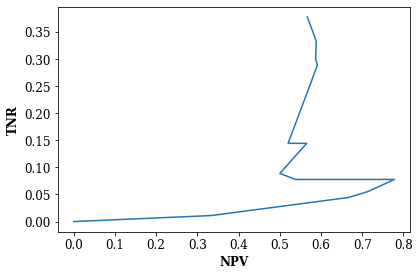

In [170]:
# plot NPV vs TNR

num = 20
Thr = np.linspace(0.15,0.50,num = num)
NPV_vec= np.zeros(num)
TNR_vec = np.zeros(num)

for i in range(num):
    
    Y_pred_2 = (clf.predict_proba(X_test)[:,1] >= Thr[i] ).astype(bool)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_2).ravel()
    NPV_vec[i] = tn/(fn+tn)
    TNR_vec[i] = tn/(tn+fp)
    print('Thr[i], NPV_vec[i], TNR_vec[i]', Thr[i], NPV_vec[i], TNR_vec[i])

plt.plot(NPV_vec,TNR_vec)

plt.xlabel('NPV')
plt.ylabel('TNR')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_NPV' +'.png', dpi=300)



plt.plot()

In [ ]:
# Other scores:


#Y_test = Y_train
from sklearn.metrics import recall_score, precision_score

# print result
err_rate = np.sum(Y_pred!=Y_test)/N_test
print('classification error rate', err_rate)
print('precentage of positive labels',np.sum(Y_test)/N_test)

print(Y_test[:20])
print(Y_pred[:20])

#accuracy metrics


acc = accuracy_score(Y_test, Y_pred)

print('acc: ', acc)

#bacc = balanced_accuracy_score(Y_test, Y_pred)
#print('balanced acc: ', bacc)

auc = roc_auc_score(Y_test, Y_pred)
print('auc: ',auc)

f1score = f1_score(Y_test, Y_pred)
print('f1score: ', f1score)
# It is defined as the average of recall obtained on each class.


# since label 1 corresponds to the null hypothesis, recall  = 1- recal_score:
FNR = recall_score(Y_test,Y_pred) # 1- recall
print('False Negative Rate ( 1 - recall): ', FNR)


FDR = precision_score(Y_test,Y_pred) # 
print('FDR: ', FDR)

print('recall, precision: ', 1-FNR, 1-FDR)

In [ ]:
# use cross validated prob measure:

clf = sklearn.svm.SVC(probability = True) #probability = True
clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)
print('checkpoint')
num = 20
Thr = np.linspace(0.1,0.9,num = num)
NPV_vec= np.zeros(num)
TNR_vec = np.zeros(num)

for i in range(num):
    
    Y_pred_2 = (clf.predict_proba(X_test)[:,1] >= Thr[i] ).astype(bool)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_2).ravel()
    NPV_vec[i] = tn/(fn+tn)
    TNR_vec[i] = tn/(tn+fp)
    print('Thr[i], NPV_vec[i], TNR_vec[i]', Thr[i], NPV_vec[i], TNR_vec[i])

plt.plot(NPV_vec,TNR_vec)

plt.xlabel('NPV')
plt.ylabel('TNR')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_NPV' +'.png', dpi=300)



plt.plot()

In [ ]:
#### TRASH CODES ####



# Only for test: create direct correlations

print(np.mean(X_train[:,9]))

Y_train[np.where(X_train[:,5]<=0.2)[0]] = 0
Y_train[np.where(X_train[:,5]>0.2)[0]] = 1

Y_test[np.where(X_test[:,5]<=0.2)[0]] = 0
Y_test[np.where(X_test[:,5]>0.2)[0]] = 1